In [1]:
%load_ext autoreload
%autoreload 2

import RIS_gravity_inversion.inversion as inv 

from antarctic_plots import utils
import numpy as np
import pandas as pd
import xarray as xr
# make beep sound when notify is called at end of long-running cells
from IPython.display import Audio
wave = np.sin(2*np.pi*400*np.arange(10000*1)/10000)
notify = Audio(wave, rate=10000, autoplay=True)

import os 
os.getcwd()
%load_ext snakeviz

#  Setup inversion and layers

inner region is 1000 x 1000 km
filtering and resampling ice from 1000m to 5000m
filtering and resampling water from 1000m to 5000m
filtering and resampling bathymetry from 1000m to 5000m
resampling basement from 5000m to 5000m
ice: 78400 points, elevations:4115m to 0m
water: 78400 points, elevations:4114m to -2979m
bathymetry: 78400 points, elevations:4114m to -4093m
basement: 78400 points, elevations:5172m to -8503m
gravity: 19666 points
gravity avg. elevation: 1000
bathymetry control points:8287288


x          y       Gobs       z
0     -327500.0  -467500.0 -36.749657  1000.0
1     -322500.0  -467500.0 -37.073023  1000.0
2     -317500.0  -467500.0 -35.827257  1000.0
3     -312500.0  -467500.0 -33.941017  1000.0
4     -307500.0  -467500.0 -31.609736  1000.0
...         ...        ...        ...     ...
19661  262500.0 -1362500.0 -14.039867  1000.0
19662  267500.0 -1362500.0 -13.452381  1000.0
19663  272500.0 -1362500.0 -13.061336  1000.0
19664  277500.0 -1362500.0 -12.774685  1000.0
19665  282500.0 -1362500.0 -12.437157  1000.0

[19666 rows x 4 columns]

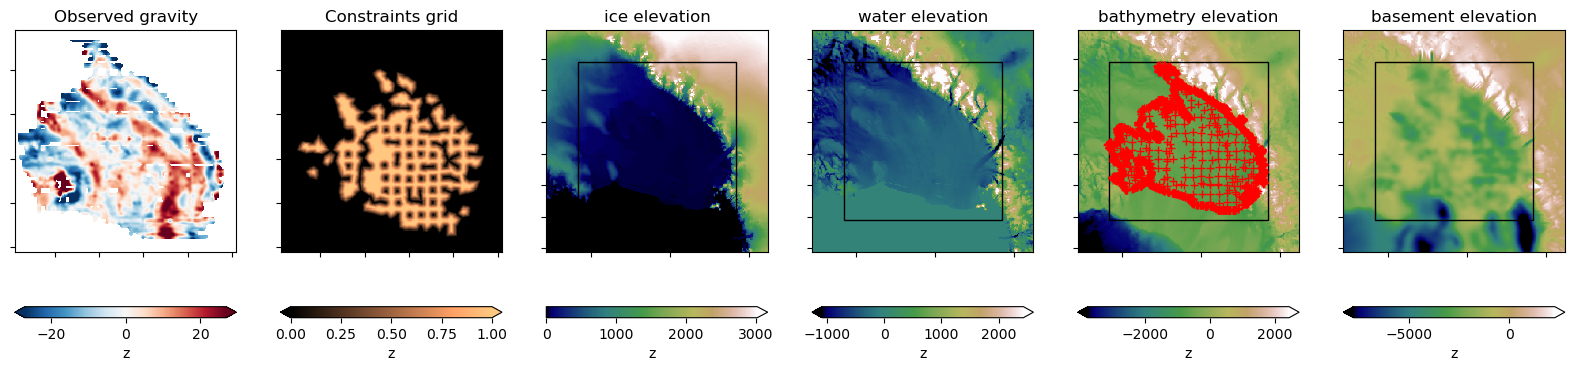

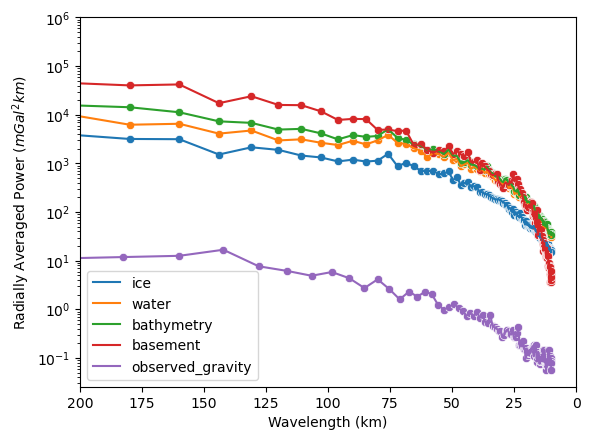

In [28]:
# starting inversion region is 1,000km x 1,000km, choose whether to zoom in, shift the 
# region to the North or West, or change the width of the buffer zone. 
inv_reg, buffer_reg, inv_proj = utils.alter_region(
    starting_region = [-580000, 420000, -1420000, -420000],
    zoom = 0,#400e3,
    n_shift = 0,
    w_shift = 0,#100e3,
    buffer = 200e3,
    )

returned = inv.import_layers(
    layers_list = [
        'ice',
        'water',
        'bathymetry',
        'basement',
        # 'moho',
        ], 
    spacing_list = [
        5e3,
        5e3,
        5e3,
        5e3,
        # 20e3,
        ], 
    rho_list = [
        920, #890 to 917 from Muto et al. 2013
        1030, #from Muto et al. 2013
        2300,
        2670,
        # 3300,
        ],
    fname_list = [
        # SURFACE 
            'inversion_layers/bedmachine/BedMachine_surface_filled.nc',
        # ICEBASE
            'inversion_layers/bedmachine/BedMachine_icebase_filled.nc',
        # BED/BATHYMETRY
            # 'bathymetry_data/bedmap_bedmachine_RIGGS_grd_fill.nc',
            # 'bathymetry_data/bedmap2_bed_regional.nc',
            'inversion_layers/bedmachine/BedMachine_bed.nc',
        # BASEMENT
            # 'inversion_layers/ANTASed_mag_basement_filled.nc',
            'inversion_layers/RE_basement_BedMachinebed_filled.nc',
            # 'inversion_layers/lindeque_basement.nc',
        # MOHO
            # 'inversion_layers/An_moho_filt.nc',
            # 'inversion_layers/Shen_moho.nc',
            # 'inversion_layers/Pappa_moho.nc',
        ],
    grav_spacing = 5e3, 
    active_layer='bathymetry',
    buffer_region = buffer_reg,
    inversion_region = inv_reg,

    # Choose between grid and csv, similar comp. times
    # grav_file='gravity_data/rosetta_eq_source_up_continued_Gobs.nc',
    grav_file='gravity_data/rosetta_eq_source_up_continued.csv',
    # grav_file = 'gravity_data/ant4d_gravity_epsg_5k.nc',

    constraints=True,
    constraints_file='constraints_grid/constraints_grid.nc',
    constraints_points='bathymetry_data/bedmachine_RIGGS.csv',
    
    plot=True,
    plot_region=buffer_reg,
    power_spectrum=True,
    )
layers, grav, grav_spacing, constraints_grid, constraints_df, constraints_RIS_df = returned
grav

# Make prism layers

basement top: -1572m and bottom: -8503m
bathymetry top: -290m and bottom: -1584m
water top: 29m and bottom: -302m
ice top: 832m and bottom: 29m


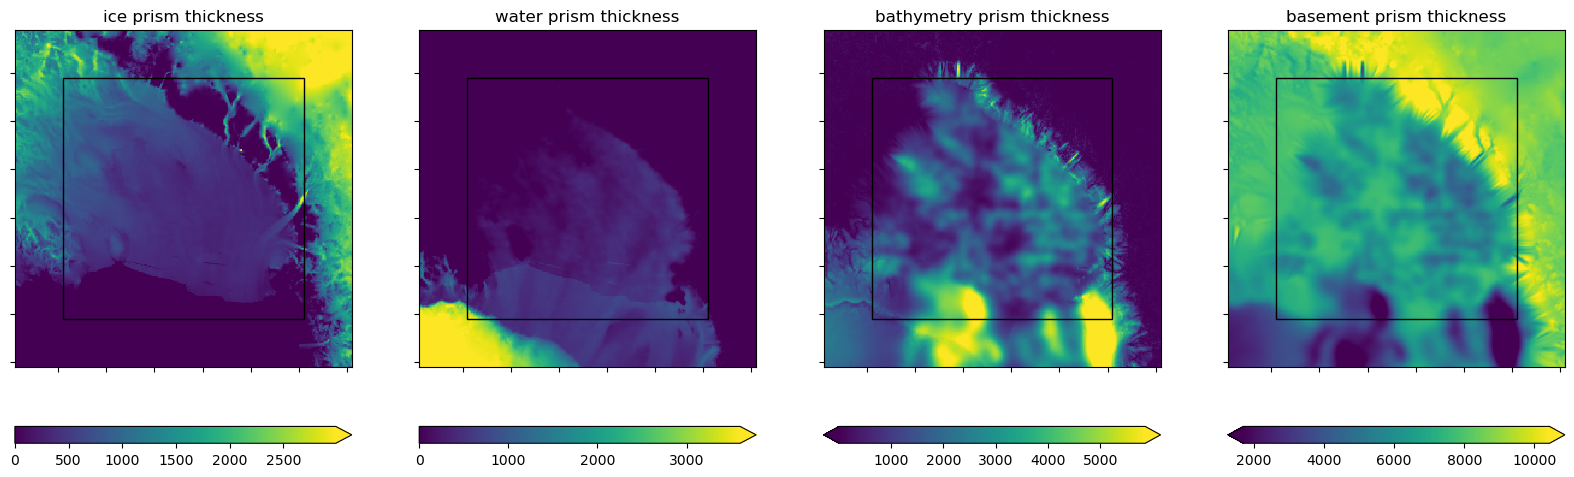

In [29]:
inv.grids_to_prism_layers(
    layers, 
    plot=True, 
    # plot_region=inv_reg,
    plot_type='2D', 
    buffer_region = buffer_reg,
    inversion_region = inv_reg,
    ) 

# Forward gravity

using supplied DataFrame for observation points
78400 prisms in ice layer
finished ice layer
78400 prisms in water layer
finished water layer
78400 prisms in bathymetry layer
finished bathymetry layer
78400 prisms in basement layer
finished basement layer


x             y          Gobs        z  ice_forward_grav  \
count   19666.000000  1.966600e+04  19666.000000  19666.0      1.966600e+04   
mean   -93661.903793 -9.902100e+05      0.000000   1000.0     -2.219859e-15   
std    223211.973413  1.971037e+05     13.005807      0.0      6.512665e+00   
min   -562500.000000 -1.362500e+06    -82.874047   1000.0     -1.567743e+01   
25%   -262500.000000 -1.147500e+06     -7.653712   1000.0     -3.123022e+00   
50%    -92500.000000 -1.002500e+06      0.152457   1000.0     -1.330493e+00   
75%     82500.000000 -8.475000e+05      7.794796   1000.0      2.911702e+00   
max    362500.000000 -4.675000e+05     75.370333   1000.0      3.360223e+01   

       water_forward_grav  bathymetry_forward_grav  basement_forward_grav  \
count        1.966600e+04             1.966600e+04           1.966600e+04   
mean        -1.479906e-15             2.108866e-14          -2.571337e-14   
std          7.769467e+00             7.265538e+01           8.589923e+01   
min         -1.120879e+01            -1.404542e+02          -3.132713e+02   
25%         -6.855393e+00            -5.640843e+01          -6.240390e+01   
50%         -1.838188e-01            -5.513623e+00           3.190209e+00   
75%          5.599077e+00             5.118296e+01           6.671897e+01   
max          2.543987e+01             2.849492e+02           1.634111e+02   

       forward_total  
count   1.966600e+04  
mean   -9.156918e-15  
std     1.557517e+01  
min    -5.362108e+01  
25%    -1.086873e+01  
50%     2.238809e-01  
75%     1.080579e+01  
max     8.985300e+01

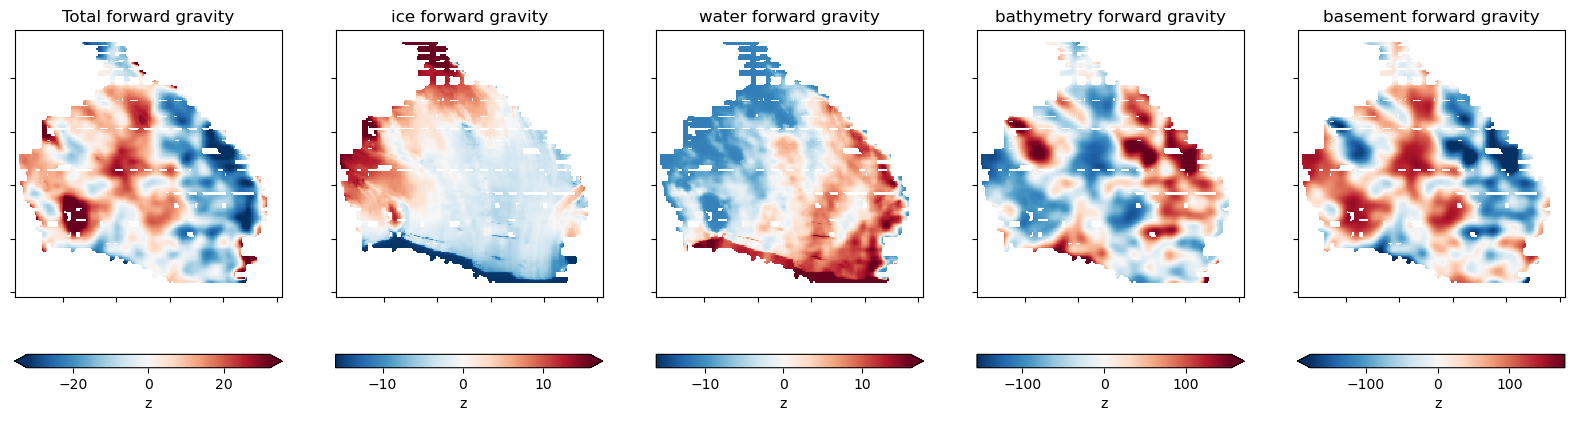

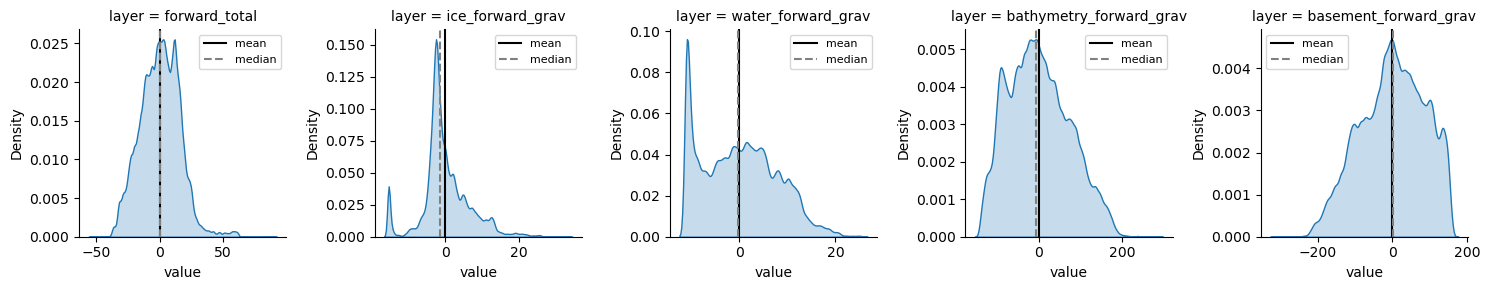

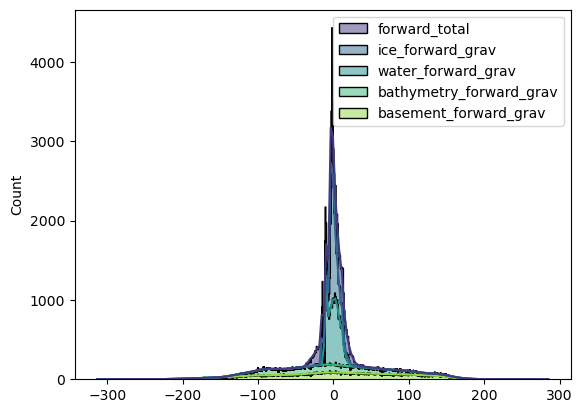

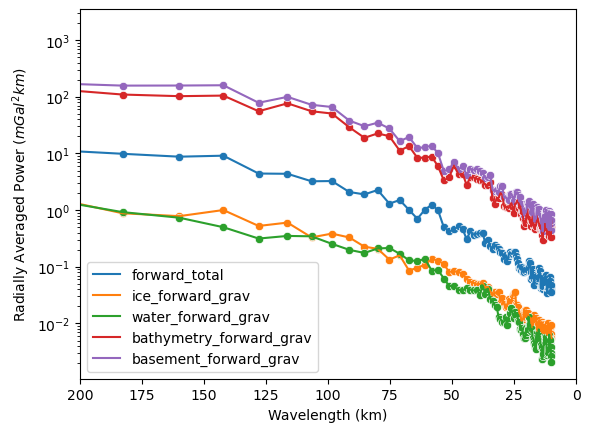

In [30]:
# use below calc at full grid extent, not just grav observation points
# grav = utils.make_grid(inv_reg, grav_spacing, 1000, "z")

df_forward = inv.forward_grav_layers(
    layers, 
    grav,  
    plot=True,
    grav_spacing=grav_spacing,
    inversion_region = inv_reg,
    # exclude_layers=['ice'],
    plot_dists=True,
    power_spectrum=True,
    )
df_forward.describe()
# 40,000 prisms, 17 secs

# Anomalies

Root mean squared residual: 10.93mGal


x             y          Gobs       z  ice_forward_grav  \
count     241.000000  2.410000e+02  2.410000e+02   241.0      2.410000e+02   
mean   -97240.663900 -9.763071e+05  4.717296e-16  1000.0     -2.358648e-15   
std    236683.597178  2.173160e+05  1.314642e+01     0.0      7.644225e+00   
min   -547500.000000 -1.352500e+06 -6.386878e+01  1000.0     -1.568191e+01   
25%   -257500.000000 -1.147500e+06 -7.199266e+00  1000.0     -3.367949e+00   
50%   -105000.000000 -9.950000e+05  2.521819e-01  1000.0     -1.510681e+00   
75%     95000.000000 -8.400000e+05  7.732076e+00  1000.0      3.739964e+00   
max    337500.000000 -4.675000e+05  4.187830e+01  1000.0      2.684760e+01   

       water_forward_grav  bathymetry_forward_grav  basement_forward_grav  \
count        2.410000e+02             2.410000e+02           2.410000e+02   
mean         4.717296e-16            -2.004851e-14          -7.877885e-14   
std          7.976341e+00             7.529619e+01           8.695676e+01   
min         -1.035115e+01            -1.435816e+02          -2.352738e+02   
25%         -7.510170e+00            -5.415450e+01          -5.752366e+01   
50%         -7.767379e-01            -6.681599e+00           6.940266e+00   
75%          6.613765e+00             4.827484e+01           6.395479e+01   
max          2.138632e+01             2.686654e+02           1.529786e+02   

       forward_total  grav_corrected        misfit         reg         res  
count   2.410000e+02    2.410000e+02  2.410000e+02  241.000000  241.000000  
mean   -1.005963e-13    2.830378e-15  1.028371e-13    0.886106   -0.886106  
std     1.926865e+01    1.669496e+01  2.637478e+01   20.192692   10.912513  
min    -3.628489e+01   -7.207454e+01 -1.569725e+02  -75.396912  -81.575625  
25%    -1.200702e+01   -8.208186e+00 -1.519034e+01  -13.222856   -6.000616  
50%    -5.719408e-01    2.712731e+00  2.704701e-02    1.416322   -0.186763  
75%     9.447254e+00    1.034624e+01  1.869224e+01   16.293060    4.782471  
max     1.078157e+02    4.692748e+01  4.842563e+01   37.315643   24.268073

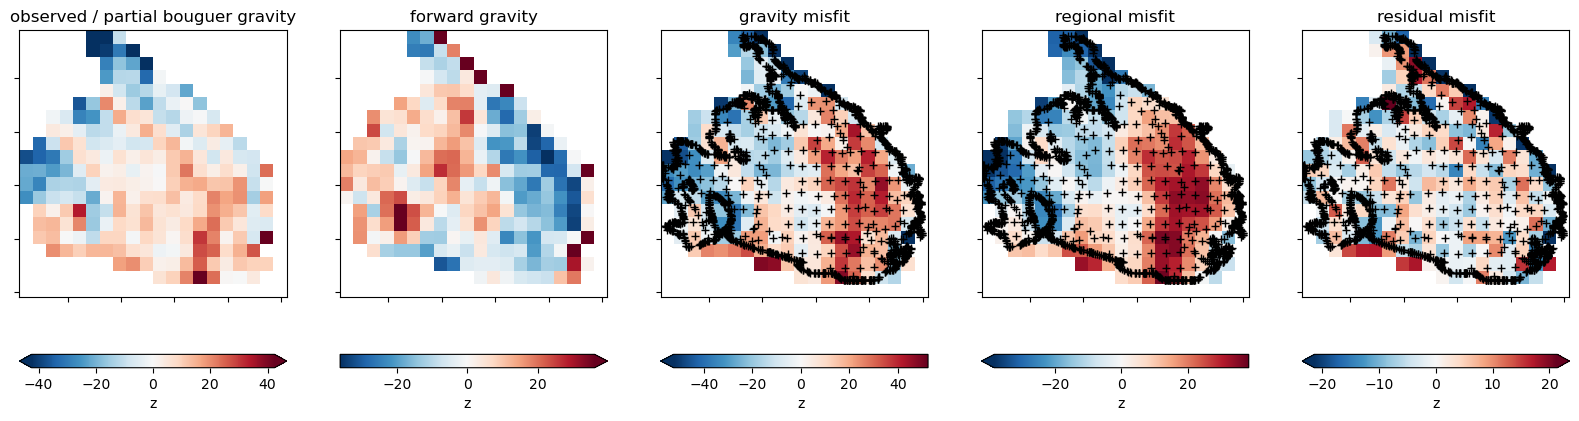

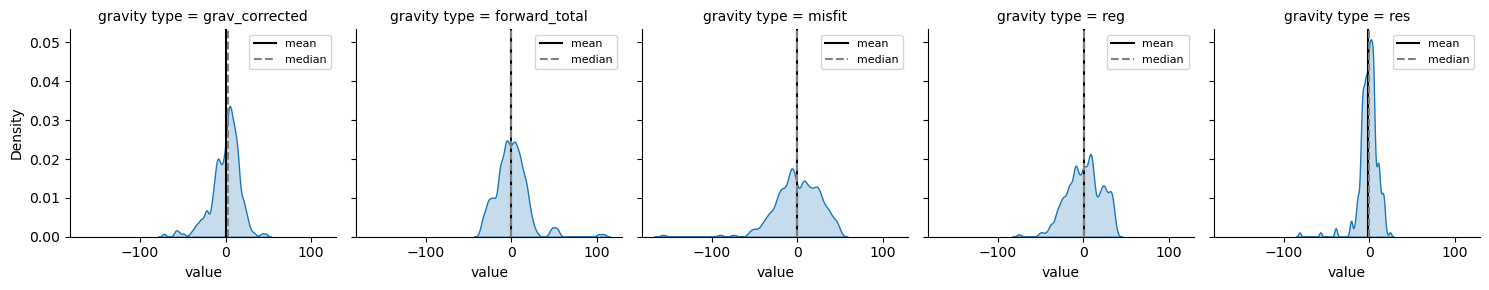

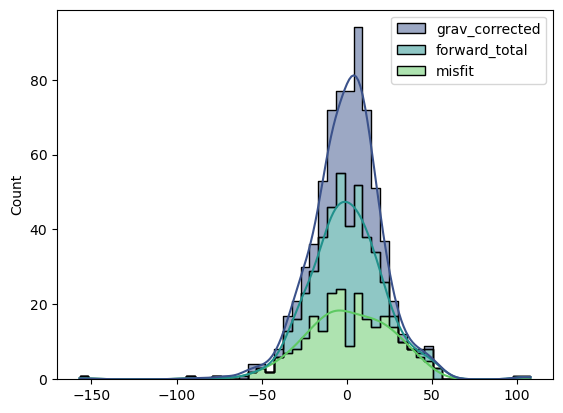

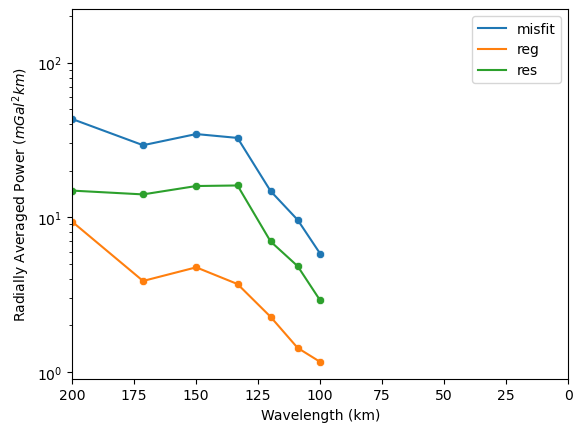

In [10]:
filter='g200e3'
df_anomalies = inv.anomalies(
        layers, 
        df_forward,
        grav_spacing, 
        'filter', 
        filter=filter,
        inversion_region=inv_reg,
        corrections=['ice'], 
        plot=True, 
        plot_constraints=True,
        constraints2plot=constraints_RIS_df,
        plot_dists=True,
        power_spectrum=True,
        )
df_anomalies.describe()

Root mean squared residual: 19.63mGal


x             y          Gobs       z  ice_forward_grav  \
count     241.000000  2.410000e+02  2.410000e+02   241.0      2.410000e+02   
mean   -97240.663900 -9.763071e+05  4.717296e-16  1000.0     -2.358648e-15   
std    236683.597178  2.173160e+05  1.314642e+01     0.0      7.644225e+00   
min   -547500.000000 -1.352500e+06 -6.386878e+01  1000.0     -1.568191e+01   
25%   -257500.000000 -1.147500e+06 -7.199266e+00  1000.0     -3.367949e+00   
50%   -105000.000000 -9.950000e+05  2.521819e-01  1000.0     -1.510681e+00   
75%     95000.000000 -8.400000e+05  7.732076e+00  1000.0      3.739964e+00   
max    337500.000000 -4.675000e+05  4.187830e+01  1000.0      2.684760e+01   

       water_forward_grav  bathymetry_forward_grav  basement_forward_grav  \
count        2.410000e+02             2.410000e+02           2.410000e+02   
mean         4.717296e-16            -2.004851e-14          -7.877885e-14   
std          7.976341e+00             7.529619e+01           8.695676e+01   
min         -1.035115e+01            -1.435816e+02          -2.352738e+02   
25%         -7.510170e+00            -5.415450e+01          -5.752366e+01   
50%         -7.767379e-01            -6.681599e+00           6.940266e+00   
75%          6.613765e+00             4.827484e+01           6.395479e+01   
max          2.138632e+01             2.686654e+02           1.529786e+02   

       forward_total  grav_corrected        misfit         reg         res  
count   2.410000e+02    2.410000e+02  2.410000e+02  241.000000  241.000000  
mean   -1.005963e-13    2.830378e-15  1.028371e-13   -1.054910    1.054910  
std     1.926865e+01    1.669496e+01  2.637478e+01   20.674170   19.642661  
min    -3.628489e+01   -7.207454e+01 -1.569725e+02  -73.044717 -104.550079  
25%    -1.200702e+01   -8.208186e+00 -1.519034e+01  -12.538084  -12.451070  
50%    -5.719408e-01    2.712731e+00  2.704701e-02    3.559934    1.793756  
75%     9.447254e+00    1.034624e+01  1.869224e+01   15.029330   14.302887  
max     1.078157e+02    4.692748e+01  4.842563e+01   24.817516   43.252840

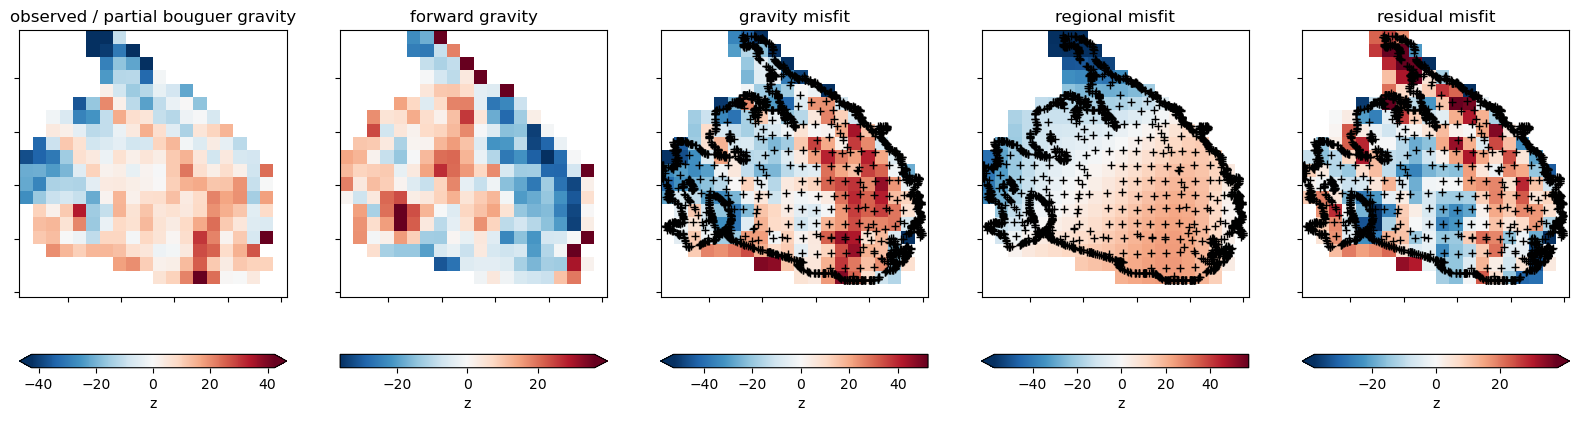

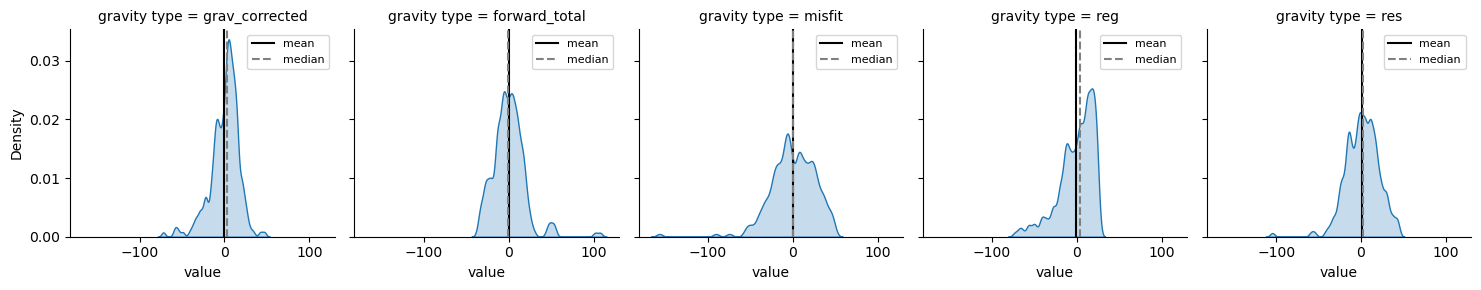

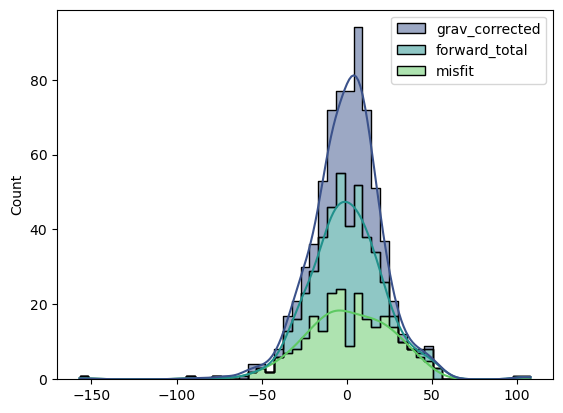

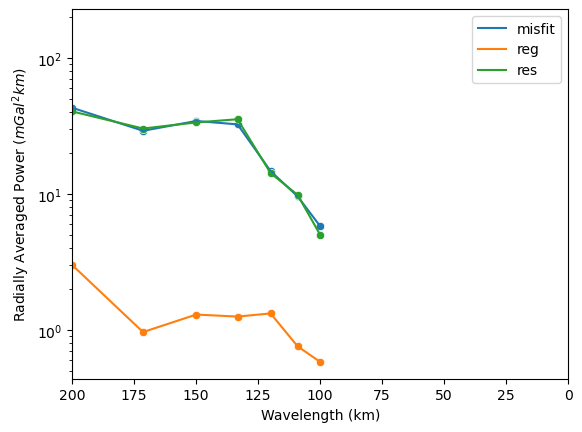

In [11]:
trend=4
df_anomalies = inv.anomalies(
        layers, 
        df_forward,
        grav_spacing, 
        'trend', 
        trend=trend,
        inversion_region=inv_reg,
        corrections=['ice'], 
        plot=True, 
        plot_constraints=True,
        constraints2plot=constraints_RIS_df,
        plot_dists=True,
        power_spectrum=True,
        )
df_anomalies.describe()

Root mean squared residual: 10.14mGal


x             y          Gobs       z  ice_forward_grav  \
count     241.000000  2.410000e+02  2.410000e+02   241.0      2.410000e+02   
mean   -97240.663900 -9.763071e+05  4.717296e-16  1000.0     -2.358648e-15   
std    236683.597178  2.173160e+05  1.314642e+01     0.0      7.644225e+00   
min   -547500.000000 -1.352500e+06 -6.386878e+01  1000.0     -1.568191e+01   
25%   -257500.000000 -1.147500e+06 -7.199266e+00  1000.0     -3.367949e+00   
50%   -105000.000000 -9.950000e+05  2.521819e-01  1000.0     -1.510681e+00   
75%     95000.000000 -8.400000e+05  7.732076e+00  1000.0      3.739964e+00   
max    337500.000000 -4.675000e+05  4.187830e+01  1000.0      2.684760e+01   

       water_forward_grav  bathymetry_forward_grav  basement_forward_grav  \
count        2.410000e+02             2.410000e+02           2.410000e+02   
mean         4.717296e-16            -2.004851e-14          -7.877885e-14   
std          7.976341e+00             7.529619e+01           8.695676e+01   
min         -1.035115e+01            -1.435816e+02          -2.352738e+02   
25%         -7.510170e+00            -5.415450e+01          -5.752366e+01   
50%         -7.767379e-01            -6.681599e+00           6.940266e+00   
75%          6.613765e+00             4.827484e+01           6.395479e+01   
max          2.138632e+01             2.686654e+02           1.529786e+02   

       forward_total  grav_corrected        misfit         reg         res  
count   2.410000e+02    2.410000e+02  2.410000e+02  241.000000  241.000000  
mean   -1.005963e-13    2.830378e-15  1.028371e-13    1.007193   -1.007193  
std     1.926865e+01    1.669496e+01  2.637478e+01   21.223079   10.115114  
min    -3.628489e+01   -7.207454e+01 -1.569725e+02  -80.612761  -76.359776  
25%    -1.200702e+01   -8.208186e+00 -1.519034e+01  -13.409458   -5.504984  
50%    -5.719408e-01    2.712731e+00  2.704701e-02    2.478688   -0.292492  
75%     9.447254e+00    1.034624e+01  1.869224e+01   16.761976    3.529055  
max     1.078157e+02    4.692748e+01  4.842563e+01   42.147314   23.334121

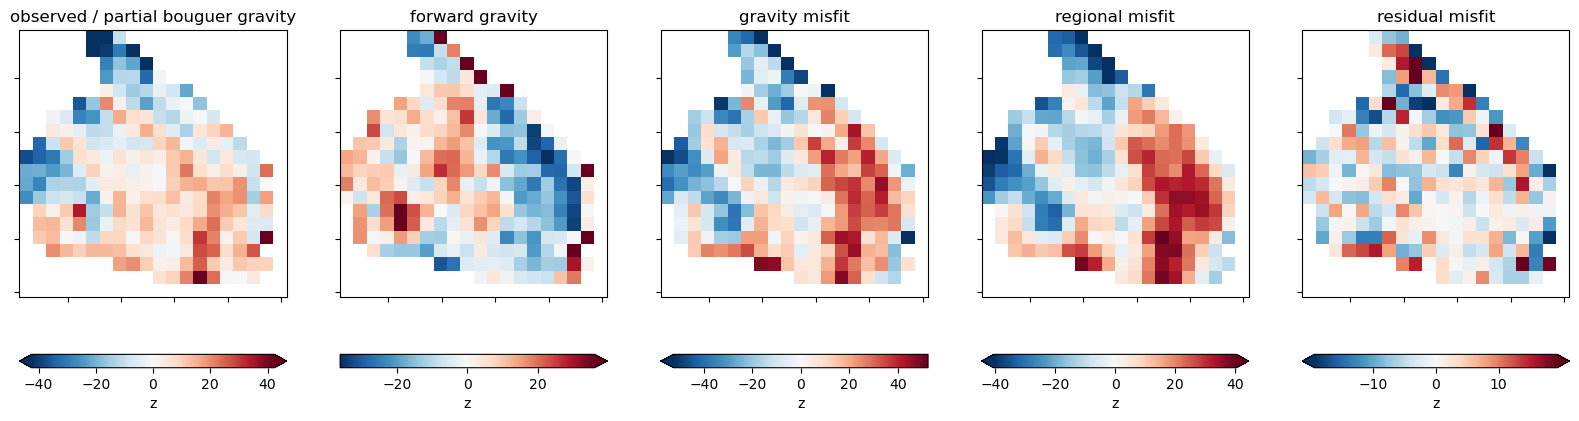

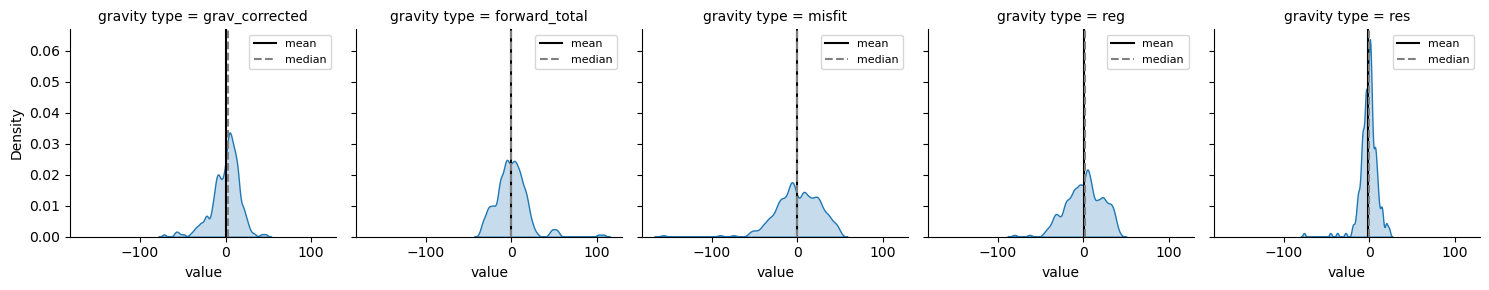

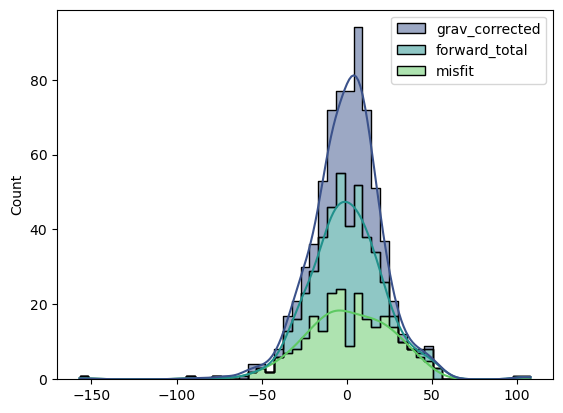

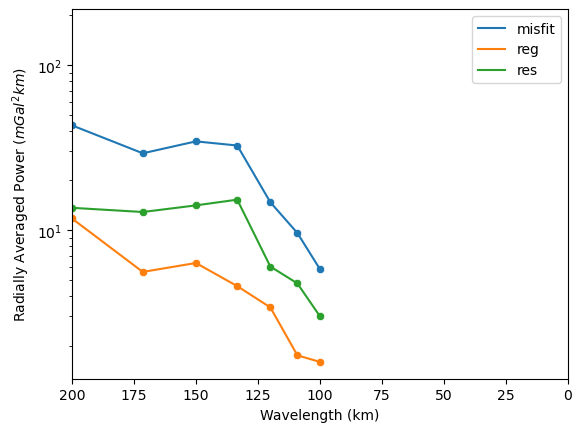

In [12]:
df_anomalies = inv.anomalies(
        layers, 
        df_forward, 
        grav_spacing, 
        'constraints', 
        constraints=constraints_df,
        constraints2plot=constraints_RIS_df,
        inversion_region=inv_reg,
        corrections=['ice'], 
        plot=True, 
        plot_constraints=False,
        plot_dists=True,
        power_spectrum=True,
        )
df_anomalies.describe()

# Geo inversion

In [13]:
# %%snakeviz --new-tab
regional_method='constraints'

topo_results, grav_results = inv.geo_inversion(
    active_layer='bathymetry',
    layers=layers, 
    input_grav=df_anomalies, 
    regional_method = regional_method,
    Max_Iterations=3,
    deriv_type='prisms',
    solver_type='least squares',
    max_layer_change_per_iter=100,

    apply_constraints = False,
    constraints_grid=constraints_grid,
    exclude_layers=['ice'],

    # filter=filter, 
    # trend=trend,
    constraints=constraints_df,

    inversion_region = inv_reg,
    buffer_region=buffer_reg,
    grav_spacing = grav_spacing,

    # save_results = True,
    # fname_topo = "topo_results_5k_constraints_base",
    # fname_gravity = "gravity_results_5k_constraints_base",
    ) 

notify
# 17 secs for least squares

##################################
iteration 1
initial RMS residual = 10.14mGal
RMS layer correction 36.94m
constraints not applied
calculating updated forward gravity
updating the misfits
Root mean squared residual: 9.01mGal
##################################
iteration 2
initial RMS residual = 9.01mGal
RMS layer correction 29.63m
constraints not applied
calculating updated forward gravity
updating the misfits
Root mean squared residual: 7.54mGal
##################################
iteration 3
initial RMS residual = 7.54mGal
RMS layer correction 24.15m
constraints not applied
calculating updated forward gravity
updating the misfits
Root mean squared residual: 6.4mGal
Inversion terminated after 3 iterations with least-squares norm=40 because maximum number of iterations (3) reached


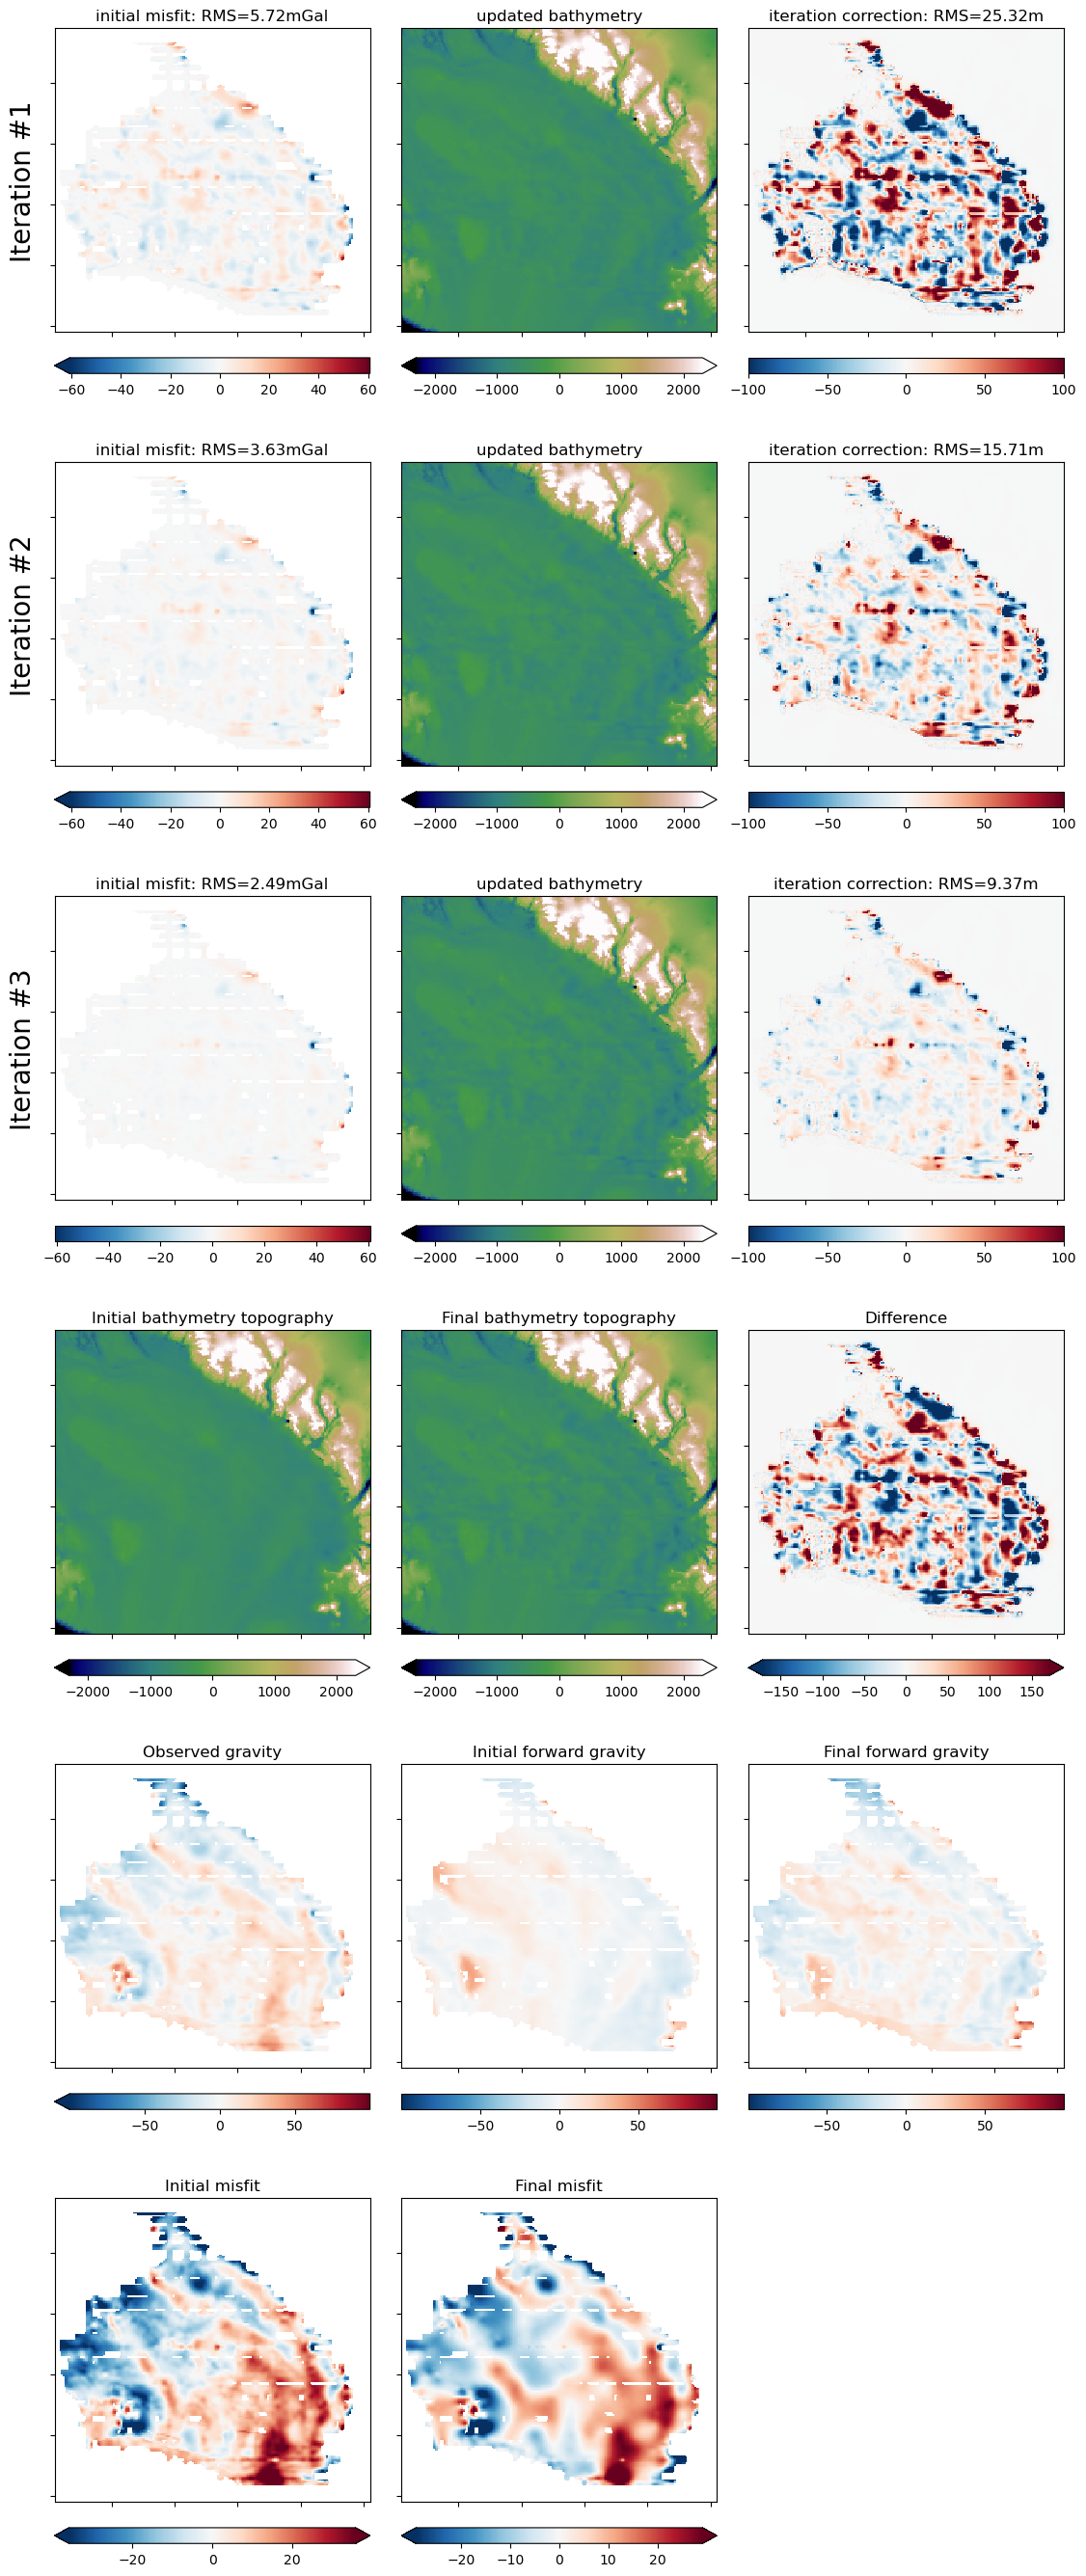

In [57]:
inv.plot_inversion_results(
    # grav_results,
    "results/gravity_results_5k_constraints_no_base.csv",
    # topo_results,
    "results/topo_results_5k_constraints_no_base.csv",
    layers,

    active_layer = 'bathymetry',
    grav_spacing = 5e3,#grav_spacing,
    epsg = 'epsg:3031',
    
    inversion_region = inv_reg,
    # plot_region = buffer_reg,
    plot_constraints = False,
    # constraints = constraints_RIS_df,
    
    save_topo_nc=True,
    topo_fname='inverted_topo_5k_constraints_no_base',

    save_residual_nc=True,
    residual_fname='initial_residual_5k_constraints_no_base',
)


grid regions and spacing match


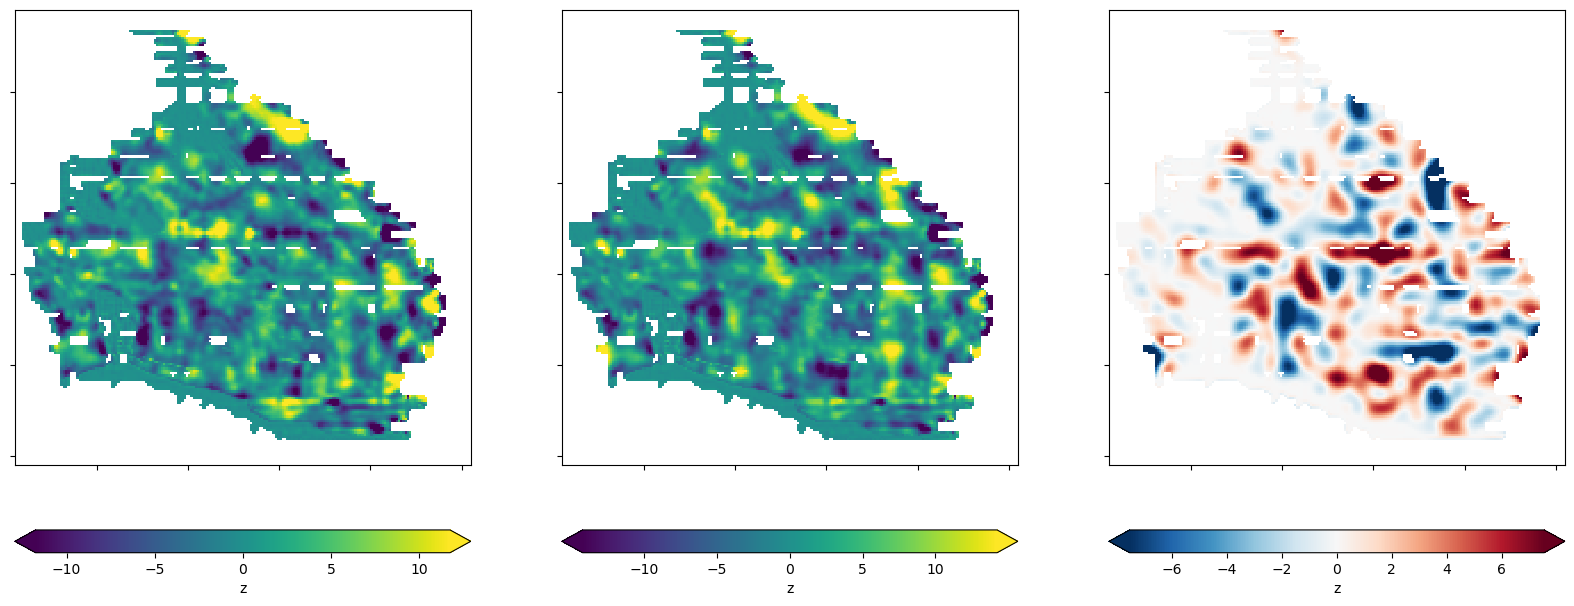

In [100]:
dif = utils.grd_compare(
    'results/initial_residual_5k_constraints_no_base.nc', 
    'results/initial_residual_5k_constraints_base.nc',
    robust = True,
    )

grid regions and spacing match


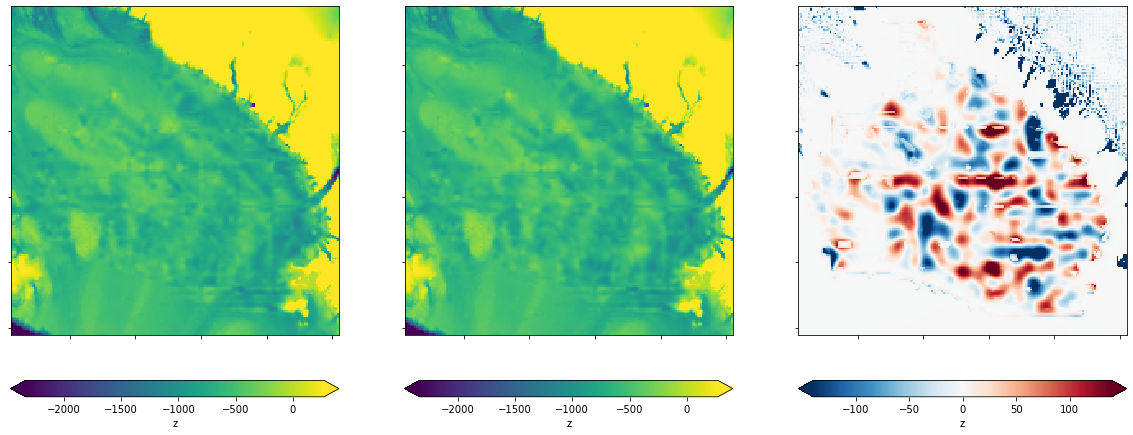

In [2]:
dif = utils.grd_compare(
    'results/inverted_topo_5k_constraints_no_base.nc', 
    'results/inverted_topo_5k_constraints_base.nc',
    shp_mask = "plotting/MEaSUREs_RIS.shp")
    

grid spacings and regions dont match, using smaller spacing (1000m) and inner region.


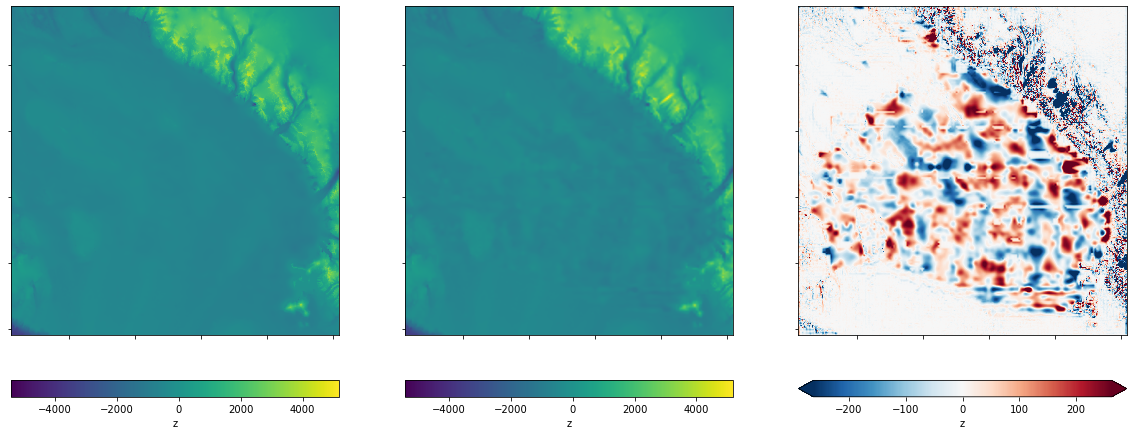

In [2]:
da1 = xr.load_dataarray("inversion_layers/bedmachine/BedMachine_bed.nc")
da2 = xr.load_dataarray('results/inverted_topo_5k_constraints_base.nc')

dif = utils.grd_compare(
    da1, 
    da2,
    # shp_mask = "plotting/MEaSUREs_RIS.shp",
    )


In [3]:
from ipyfastscape import TopoViz3d
ds2 = da2.to_dataset()
ds2

<xarray.Dataset>
Dimensions:  (x: 200, y: 200)
Coordinates:
  * x        (x) float64 -5.775e+05 -5.725e+05 ... 4.125e+05 4.175e+05
  * y        (y) float64 -1.418e+06 -1.412e+06 ... -4.275e+05 -4.225e+05
Data variables:
    z        (y, x) float32 -3.374e+03 -3.433e+03 -3.483e+03 ... -274.6 -342.1

In [4]:
app = TopoViz3d(ds2, elevation_var='z')

app.show()

Output(layout=Layout(height='600px'))

# Density inversion

In [ ]:
# density_inversion(
    # density_layer='bathymetry', 
    # plot=True
    # ) 
#10mins, 200km zoom/5k, 3.5mins 400km zoom/5k (113x113 prisms, 33x33 grav)
# notify